# Exploratory Analysis
## A Discrete Zillow Parcel Inventory

#### Data sourced from Zaggle based, "Zillow Prize: Zillow’s Home Value Prediction" - September 24, 2017

__Data background:__ Zillow is a market leading and industry transforming marketplace for real estate sales, rental, property
valuation and housing atttributes across the U.S.  Zillow maintains a "living", nationwide inventory of approximately 110 million homes.  Zillow generates over $1 BN in annual revenue through platform advertising and real estate related services to over 180 million monthly visitors.

In [4]:
# zillow 2 color pallette - blue #5477bb, green #87bc43
# import libraries
%matplotlib inline
from itertools import cycle, islice
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import time
import csv
import json
import pprint
import seaborn as sns
import missingno as msno

# load CSV file from local directory. create initial, zillowDF207 dataframe
csvfile = ("properties_2017.csv")
zillowDF2017 = pd.read_csv(csvfile)

zw2color = (['#5477bb','#87bc43'])
zw3color = (['#5477bb','#87bc43','#A6D785'])
            

C:\Users\selli\Anaconda36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Begin Discovery on full, zillowDF2017 Dataframe

In [2]:
# DF return row x column dimension
zillowDF2017.shape

(2985217, 58)

In [3]:
# return first 5 rows of DF
zillowDF2017.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [4]:
# create a quick random set to view
zw_rand = zillowDF2017.sample(10000)
zw_rand.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
1853684,11541386,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,NaN,...,NaN,NaN,59082.0,130522.0,2016.0,71440.0,2235.94,NaN,NaN,6.037703e+13
1562935,14195794,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,NaN,...,NaN,NaN,318551.0,425336.0,2016.0,106785.0,5306.78,NaN,NaN,6.059022e+13
1070588,14223564,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1.0,NaN,66692.0,98985.0,2016.0,32293.0,1296.36,NaN,NaN,6.059076e+13
1099781,14037980,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1.0,NaN,83073.0,239133.0,2016.0,156060.0,2916.60,NaN,NaN,6.059100e+13
2976629,12857148,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,...,NaN,NaN,136089.0,236031.0,2016.0,99942.0,2963.66,NaN,NaN,6.037409e+13


In [5]:
# Describe DF
zillowDF2017.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,815362.000000,6061.000000,1627.000000,2.982260e+06,2.982272e+06,12731.000000,1.941395e+06,2.868061e+06,17379.0,...,2646.000000,2.937384e+06,685676.000000,2.938753e+06,2.950951e+06,2.982284e+06,2.925291e+06,2.962465e+06,56517.000000,2.910232e+06
mean,1.332586e+07,1.945723,7.202607,647.220652,2.216196e+00,3.093362e+00,3.734742,6.280822e+00,2.303826e+00,66.0,...,278.365457,1.964438e+03,1.400956,1.781429e+05,4.435279e+05,2.015998e+03,2.684558e+05,5.408949e+03,13.891696,6.048434e+13
std,7.909966e+06,3.160507,2.436290,538.787104,1.078250e+00,1.271569e+00,0.500371,1.729923e+00,1.003243e+00,0.0,...,369.784399,2.364428e+01,0.539056,4.600503e+05,8.163366e+05,6.039949e-02,4.865097e+05,9.675567e+03,2.562172,3.249133e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,2.400000e-01,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,5.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.766600e+04,1.882200e+05,2.016000e+03,7.970000e+04,2.468620e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,535.000000,2.000000e+00,3.000000e+00,4.000000,6.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.270660e+05,3.211610e+05,2.016000e+03,1.766190e+05,4.007620e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.500000,3.000000e+00,4.000000e+00,4.000000,8.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,2.040000e+05,5.140720e+05,2.016000e+03,3.261000e+05,6.230500e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,3.200000e+01,2.500000e+01,5.000000,1.200000e+01,3.200000e+01,66.0,...,6141.000000,2.016000e+03,41.000000,2.553212e+08,3.196225e+08,2.016000e+03,9.401108e+07,3.823176e+06,99.000000,4.830301e+14


In [6]:
zillowDF2017['parcelid'].nunique()

2985217

### zillowDF2017 Dimensions:

- 2,985,217 Rows of data
- 58 data columns
- Mixed DataTypes


__Data Elements include:__

- 'parcelid' is unique identifier (count = 3,985,217)
- Home attributes: counts & amounts - bedrooms, baths, sq. footage, garage, pool, year built, etc.
- Home attributes: codes - A/C & heating type, land use & zoning codes
- Geography: state/county, zip code, Zillow neighborhood designation, Census Tract/Block
- Assessment figures: land value, structure value, total value, assessment year, tax amount



In [7]:
# count column values across the DF
# counts indicated wide variation in column population
zillowDF2017.count()

parcelid                        2985217
airconditioningtypeid            815362
architecturalstyletypeid           6061
basementsqft                       1627
bathroomcnt                     2982260
bedroomcnt                      2982272
buildingclasstypeid               12731
buildingqualitytypeid           1941395
calculatedbathnbr               2868061
decktypeid                        17379
finishedfloor1squarefeet         203758
calculatedfinishedsquarefeet    2940120
finishedsquarefeet12            2720786
finishedsquarefeet13               7671
finishedsquarefeet15             190185
finishedsquarefeet50             203758
finishedsquarefeet6               21482
fips                            2982285
fireplacecnt                     313124
fullbathcnt                     2868061
garagecarcnt                     891008
garagetotalsqft                  891008
hashottuborspa                    50062
heatingorsystemtypeid           1869164
latitude                        2982285


Text(204,0.5,'Record Number (asc)')

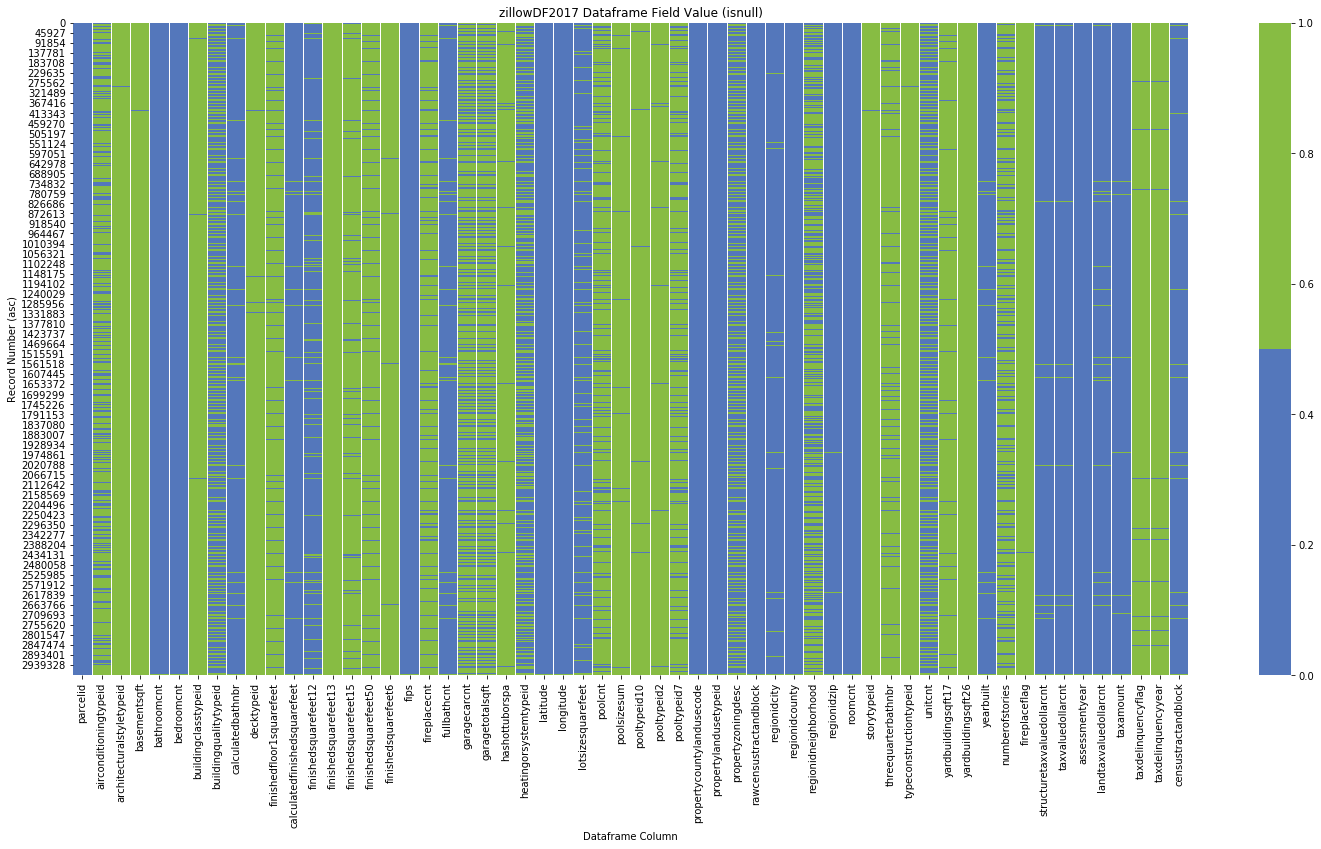

In [8]:
plt.figure(figsize = (25,12))
zw2color = (['#5477bb','#87bc43'])
sns.heatmap(zillowDF2017.isnull(), cmap = zw2color)
plt.title("zillowDF2017 Dataframe Field Value (isnull)")
plt.xlabel("Dataframe Column")
plt.ylabel("Record Number (asc)")

### Determination: Dropping columns with the high NaN counts is a safe approach.

In [7]:
# Drop DF columns with high NaN count values, creating a new DF zillowDF2017_Trunc
zillowDF2017_Trunc = zillowDF2017.drop(columns=['architecturalstyletypeid',
'basementsqft',
'buildingclasstypeid',
'finishedfloor1squarefeet',
'decktypeid',
'finishedsquarefeet12',
'finishedsquarefeet13',
'finishedsquarefeet15',
'finishedsquarefeet50',
'finishedsquarefeet6',
'fireplacecnt',
'fullbathcnt',
'garagetotalsqft',
'hashottuborspa',
'heatingorsystemtypeid',
'poolsizesum',
'pooltypeid10',
'pooltypeid2',
'pooltypeid7',
'propertycountylandusecode',
'propertyzoningdesc',
'rawcensustractandblock',
'storytypeid',
'threequarterbathnbr',
'typeconstructiontypeid',
'yardbuildingsqft17',
'yardbuildingsqft26',
'numberofstories',
'fireplaceflag',
'taxdelinquencyflag',
'taxdelinquencyyear'
])
# Rename remaining DF columns for ease of use
zillowDF2017_Trunc.columns = ['parcelid',
'ac_type',
'bath',
'beds',
'bldg_qual',
'calc_bath',
'calc_sqft',
'fips',
'garage',
'lat',
'lng',
'lot_sqft',
'pool',
'landuse_id',
'region_city',
'region_cnty',
'region_neighborhood',
'regionzip',
'rooms',
'units',
'yearbuilt',
'tax_structure',
'tax_total',
'assessment_yr',
'tax_land',
'tax_bill_ayr',
'tractblk']
zillowDF2017_Trunc.head()

,parcelid,ac_type,bath,beds,bldg_qual,calc_bath,calc_sqft,fips,garage,lat,...,regionzip,rooms,units,yearbuilt,tax_structure,tax_total,assessment_yr,tax_land,tax_bill_ayr,tractblk
0,10754147,NaN,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34144442.0,...,96337.0,0.0,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,NaN,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34140430.0,...,96337.0,0.0,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,NaN,0.0,0.0,NaN,NaN,73026.0,6037.0,NaN,33989359.0,...,96095.0,0.0,2.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,NaN,0.0,0.0,6.0,NaN,5068.0,6037.0,NaN,34148863.0,...,96424.0,0.0,NaN,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,NaN,0.0,0.0,NaN,NaN,1776.0,6037.0,NaN,34194168.0,...,96450.0,0.0,1.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


Text(204,0.5,'Record Number (asc)')

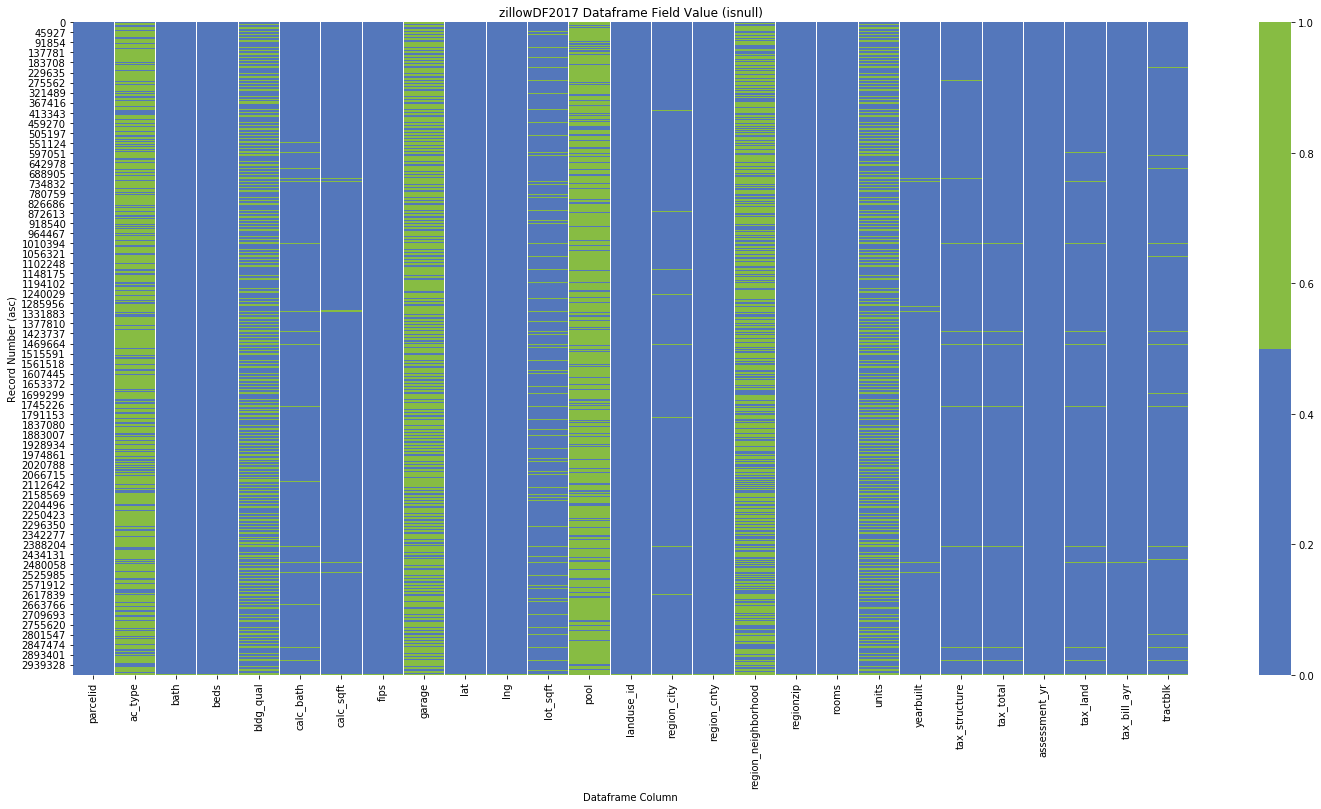

In [10]:
# plot (isnull) heatmap with with truncated DF
plt.figure(figsize = (25,12))
zw2color = (['#5477bb','#87bc43'])
zw3color = (['#5477bb','#87bc43'])
sns.heatmap(zillowDF2017_Trunc.isnull(), cmap = zw2color)
plt.title("zillowDF2017 Dataframe Field Value (isnull)")
plt.xlabel("Dataframe Column")
plt.ylabel("Record Number (asc)")

### The Top Level Geography of the Dataframe is County
County designation is identified via FIPS (code), a U.S. standardized designation for U.S. geography.
In the case of U.S. counties, FIPS code contains a state code component and a county w/in state code component.
A simple groupby of the FIPS column tells us our DF is composed of parcels in California's ( 6) Los Angeles County (037),
Orange County (059) and Ventura County (111).

In [11]:
# groupby and count by (county) FIPS across DF -- where 6037 = 'Los Angeles', 6059 = 'Orange', 6111 = 'Ventura'
fipsCount = zillowDF2017_Trunc.groupby('fips').count()
fipsCount

,parcelid,ac_type,bath,beds,bldg_qual,calc_bath,calc_sqft,garage,lat,lng,...,regionzip,rooms,units,yearbuilt,tax_structure,tax_total,assessment_yr,tax_land,tax_bill_ayr,tractblk
fips,,,,,,,,,,,,,,,,,,,,,
6037.0,2012741,726536,2012719,2012731,1941395,1957657,2002214,9,2012741,2012741,...,2007615,2012707,1962731,1999624,1977997,1987828,2012741,1987827,2004170,1957791
6059.0,745800,88826,745797,745797,0,705088,718508,687969,745800,745800,...,742185,745797,13646,718551,745003,745703,745800,723649,740876,733416
6111.0,223744,0,223744,223744,0,205316,219398,203030,223744,223744,...,222703,223744,4665,219209,215753,217420,223743,213815,217419,219025


### Create and Compare County Average Parcels

In [3]:

# Create empty summary table for purchase summary calcs
avg_parcel = pd.DataFrame(columns =['Geo',
                                    'avg_bath',
                                    'avg_beds',
                                    'avg_calc_bath',
                                    'avg_calc_sqft',
                                    'avg_tax_structure',
                                    'avg_tax_land',
                                    'avg_tax_total',
                                    'avg_tax_bill_ayr',
                                    'avg_lot_sqft',
                                    'avg_yearbuilt',
                                    'avg_doll_sf'
                                   ])
 # Add Full set averages                                   
avg_parcel.loc[0] = (['Full Set', zillowDF2017_Trunc['bath'].mean(),
                                    zillowDF2017_Trunc['beds'].mean(),
                                    zillowDF2017_Trunc['calc_bath'].mean(),
                                    zillowDF2017_Trunc['calc_sqft'].mean(),
                                    zillowDF2017_Trunc['tax_structure'].mean(),
                                    zillowDF2017_Trunc['tax_land'].mean(),
                                    zillowDF2017_Trunc['tax_total'].mean(),
                                    zillowDF2017_Trunc['tax_bill_ayr'].mean(),
                                    zillowDF2017_Trunc['lot_sqft'].mean(),
                                    zillowDF2017_Trunc['yearbuilt'].mean(),
                                    zillowDF2017_Trunc['tax_total'].mean()/zillowDF2017_Trunc['calc_sqft'].mean()
                                   ])
# Loc LA
LA = zillowDF2017_Trunc.loc[zillowDF2017_Trunc['fips'] ==  6037]
avg_parcel.loc[1] = (['Los Angeles', LA['bath'].mean(),
                                    LA['beds'].mean(),
                                    LA['calc_bath'].mean(),
                                    LA['calc_sqft'].mean(),
                                    LA['tax_structure'].mean(),
                                    LA['tax_land'].mean(),
                                    LA['tax_total'].mean(),
                                    LA['tax_bill_ayr'].mean(),
                                    LA['lot_sqft'].mean(),
                                    LA['yearbuilt'].mean(),
                                    LA['tax_total'].mean()/LA['calc_sqft'].mean()
                                   ])
# Loc Orange
ORG = zillowDF2017_Trunc.loc[zillowDF2017_Trunc['fips'] == 6059]
avg_parcel.loc[2] = (['Orange', ORG['bath'].mean(),
                                    ORG['beds'].mean(),
                                    ORG['calc_bath'].mean(),
                                    ORG['calc_sqft'].mean(),
                                    ORG['tax_structure'].mean(),
                                    ORG['tax_land'].mean(),
                                    ORG['tax_total'].mean(),
                                    ORG['tax_bill_ayr'].mean(),
                                    ORG['lot_sqft'].mean(),
                                    ORG['yearbuilt'].mean(),
                                    ORG['tax_total'].mean()/ORG['calc_sqft'].mean()
                                   ])
# loc Ventura
VNT = zillowDF2017_Trunc.loc[zillowDF2017_Trunc['fips'] == 6111]
avg_parcel.loc[3] = (['Ventura', VNT['bath'].mean(),
                                    VNT['beds'].mean(),
                                    VNT['calc_bath'].mean(),
                                    VNT['calc_sqft'].mean(),
                                    VNT['tax_structure'].mean(),
                                    VNT['tax_land'].mean(),
                                    VNT['tax_total'].mean(),
                                    VNT['tax_bill_ayr'].mean(),
                                    VNT['lot_sqft'].mean(),
                                    VNT['yearbuilt'].mean(),
                                    VNT['tax_total'].mean()/VNT['calc_sqft'].mean()
                                   ])

avg_parcel.head()

,Geo,avg_bath,avg_beds,avg_calc_bath,avg_calc_sqft,avg_tax_structure,avg_tax_land,avg_tax_total,avg_tax_bill_ayr,avg_lot_sqft,avg_yearbuilt,avg_doll_sf
0,Full Set,2.216196,3.093362,2.303826,1831.455292,178142.887952,268455.769121,443527.931066,5408.948842,22603.755199,1964.437713,242.172404
1,Los Angeles,2.217172,3.105603,2.279525,1799.853801,177882.380235,255952.599105,432955.115674,5403.719647,27824.950203,1959.393157,240.550158
2,Orange,2.238110,3.063899,2.364869,1910.087373,173142.525150,320587.634645,484086.321078,5655.732578,8188.298882,1974.952943,253.436742
3,Ventura,2.134363,3.081455,2.325900,1862.336015,197797.626346,208258.713668,401086.690001,4616.212457,12816.232922,1975.985991,215.367521


In [4]:
avg_parcel.to_csv('avg_parcel.csv', encoding='utf-8', index=False)

In [20]:
zillow_df = zillowDF2017_Trunc

In [21]:
countyLA = zillow_df.loc[zillow_df["fips"] == 6037]
countyOC = zillow_df.loc[zillow_df["fips"] == 6059]
countyVC = zillow_df.loc[zillow_df["fips"] == 6111]

In [22]:
counties = zillow_df.set_index(["fips"])

In [23]:
countiesRenamed = counties.rename({6037: "Los Angeles", 6059: "Orange County", 6111: "Ventura County"})

In [24]:
#countyLAData = countyLA.rename({6037: "Los Angeles"})
losAngelesData = countyLA.set_index(["fips"])
losAngelesDataRenamed = losAngelesData.rename({6037: "Los Angeles"})

In [25]:
orangeCountyData = countyOC.set_index(["fips"])
orangeCountyDataRenamed = orangeCountyData.rename({6059: "Orange County"})

In [26]:
venturaCountyData = countyVC.set_index(["fips"])
venturaCountyDataRenamed = venturaCountyData.rename({6111: "Ventura County"})

In [27]:
averageSquareFeetLA = losAngelesDataRenamed.groupby("fips")["calc_sqft"].mean()

In [28]:
averageSquareFeetOC = orangeCountyDataRenamed.groupby("fips")["calc_sqft"].mean()

In [29]:
averageSquareFeetVC = venturaCountyDataRenamed.groupby("fips")["calc_sqft"].mean()

In [30]:
avgLA = countiesRenamed.groupby("fips")["calc_sqft"].mean()

In [31]:
squareFeet_df = pd.DataFrame({"Average Sq Ft Per County": avgLA})
newSquareFeet_df = squareFeet_df[(squareFeet_df.T !=0).any()]
newSquareFeet_df

,Average Sq Ft Per County
fips,
Los Angeles,1799.853801
Orange County,1910.087373
Ventura County,1862.336015


(1500, 2005.5917413584818)

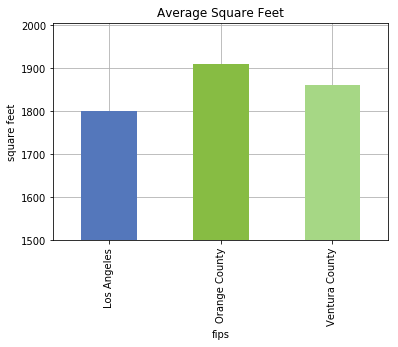

In [75]:
squareFootChart = newSquareFeet_df.plot(kind='bar', zorder=3, yticks=range(0,2018,100), legend=False,
                                        color=tuple(["#5477bb","#87bc43","#A6D785"]))
squareFootChart.set_ylabel("square feet")
plt.title("Average Square Feet")
squareFootChart.grid()
squareFootChart.set_ylim(1500)

#zw3color = (['#5477bb','#87bc43','#A6D785'])

In [33]:
losAngelesBeds = losAngelesDataRenamed["beds"].mean()

In [34]:
orangeCountyBeds = orangeCountyDataRenamed["beds"].mean()

In [35]:
venturaCountyBeds = venturaCountyDataRenamed["beds"].mean()

In [36]:
avgBedLA = countiesRenamed.groupby("fips")["beds"].mean()

In [37]:
bedrooms_df = pd.DataFrame({"Average Number of Bedrooms per County": avgBedLA})
newBedrooms_df = bedrooms_df[(bedrooms_df.T !=0).any()]
newBedrooms_df

,Average Number of Bedrooms per County
fips,
Los Angeles,3.105603
Orange County,3.063899
Ventura County,3.081455


### Average Number of Bedrooms in Each County

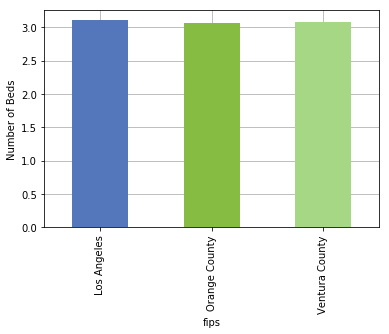

In [76]:
#colors = list(islice(cycle(["r", 'r', "y"]), None, len(newBedrooms_df)))
bedroomChart = newBedrooms_df.plot(kind='bar', legend=False, align='center', zorder=3, 
                                   color=tuple(["#5477bb","#87bc43","#A6D785"]))
bedroomChart.set_ylabel("Number of Beds")
bedroomChart.grid()

In [39]:
priceLA = losAngelesDataRenamed.groupby("fips")["tax_total"].sum()
sumOfSqFtLA = losAngelesDataRenamed.groupby("fips")["calc_sqft"].sum()
pricePerFtLA = priceLA / sumOfSqFtLA

In [40]:
priceOC = orangeCountyDataRenamed.groupby("fips")["tax_total"].sum()
sumOfSqFtOC = orangeCountyDataRenamed.groupby("fips")["calc_sqft"].sum()
pricePerFtOC = priceOC / sumOfSqFtOC

In [41]:
priceVC = venturaCountyDataRenamed.groupby("fips")["tax_total"].sum()
sumOfSqFtVC = venturaCountyDataRenamed.groupby("fips")["calc_sqft"].sum()
pricePerFtVC = priceVC / sumOfSqFtVC

In [42]:
priceFinal = countiesRenamed.groupby("fips")["calc_sqft"].mean()

In [70]:
price_df = pd.DataFrame({"Square Foot Price": priceFinal})
newPrice_df = price_df[(price_df.T !=0).any()]
newPrice_df

,Square Foot Price
fips,
Los Angeles,1799.853801
Orange County,1910.087373
Ventura County,1862.336015


### Average Price Per Square Foot

Text(0.5,0,'Price (Per Square Foot)')

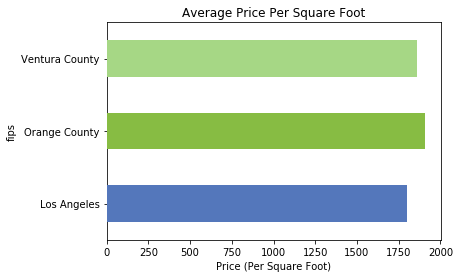

In [74]:
squareFtChart = newPrice_df.plot(kind='barh', legend=False, zorder=3, yticks=range(1000,2000,50), color=tuple(["#5477bb","#87bc43","#A6D785"]))
plt.title("Average Price Per Square Foot")
plt.xlabel("Price (Per Square Foot)")
#squareFootChart.set_xlim(750)

In [45]:
yearBuiltLA = losAngelesDataRenamed.groupby("fips")["yearbuilt"].mean()

In [46]:
yearBuiltOC = orangeCountyDataRenamed.groupby("fips")["yearbuilt"].mean()

In [47]:
yearBuiltVC = venturaCountyDataRenamed.groupby("fips")["yearbuilt"].mean()

In [48]:
houseAge = countiesRenamed.groupby("fips")["yearbuilt"].mean()

In [49]:
houseAge_df = pd.DataFrame({"Average Home Built (Year)": houseAge})
newHouseAge_df = houseAge_df[(houseAge_df.T !=0).any()]
newHouseAge_df

,Average Home Built (Year)
fips,
Los Angeles,1959.393157
Orange County,1974.952943
Ventura County,1975.985991


__Beverly Hills (90210) - 1956 Paul Trousdale develops Trousdale Estates (Same year Elvis writes "Heartbreak Hotel") This neighborhood ends up becoming home to Elvis, Frank Sinatra, Dean Martin, eventually Richard Nixon__

### Average Home Built (Year)

(1700, 2074.785290065645)

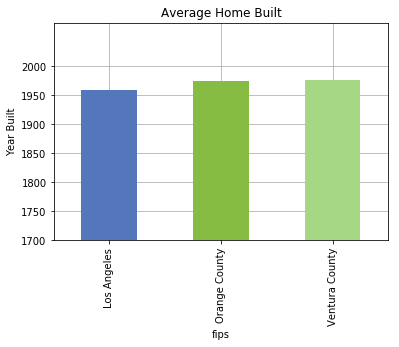

In [73]:
homeAgeChart = newHouseAge_df.plot(kind='bar', legend=False, zorder=3, yticks=range(100,2018,50), color=tuple(["#5477bb","#87bc43","#A6D785"]))
plt.title("Average Home Built")
plt.ylabel("Year Built")
plt.grid()
homeAgeChart.set_ylim(1700)